# Machine Learning Model Evaluation with K-Fold Cross-Validation

In this notebook, we'll explore some key concepts for evaluating machine learning models, including k-fold cross-validation, confusion matrix, ROC curve, and regression metrics like root mean squared error (RMSE), R-squared, and mean absolute error (MAE).

## 1. Classification: Iris Dataset

We'll start with a classification example using the Iris dataset. The Iris dataset consists of 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The goal is to classify the flowers into one of three species: setosa, versicolor, or virginica.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

### K-Fold Cross-Validation

K-fold cross-validation is a technique for evaluating the performance of a machine learning model. It works by splitting the dataset into k subsets (folds) and then training and testing the model k times, each time using a different fold as the test set and the remaining folds as the training set. The final performance metric is the average of the k individual performance metrics.

In [ ]:
# Initialize the classifier
clf = DecisionTreeClassifier(random_state=2024)

# Perform k-fold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=2024)
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.86666667 0.93333333 1.         0.93333333 1.        ]
Mean cross-validation score: 0.9466666666666667


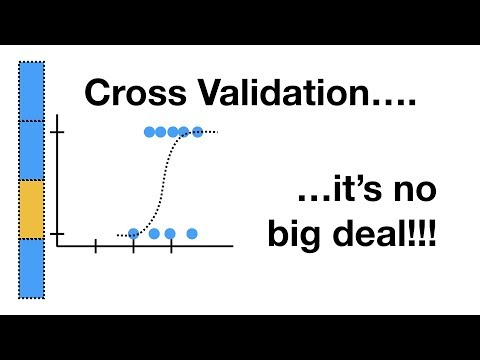

In [ ]:
from IPython.display import YouTubeVideo

video_id = 'fSytzGwwBVw'
YouTubeVideo(video_id, width=800, height=450)

### Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification model. It shows the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the model.

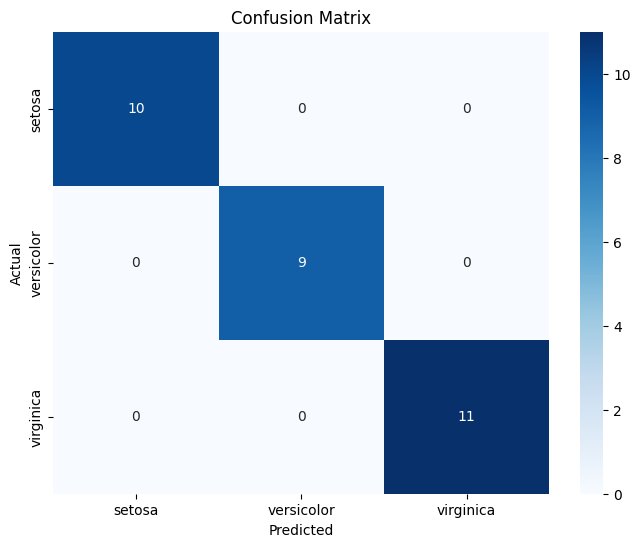

In [ ]:
# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

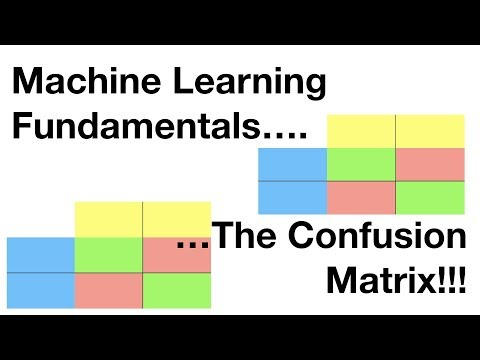

In [ ]:
from IPython.display import YouTubeVideo

video_id = 'Kdsp6soqA7o'
YouTubeVideo(video_id, width=800, height=450)

### ROC Curve

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classifier. It plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

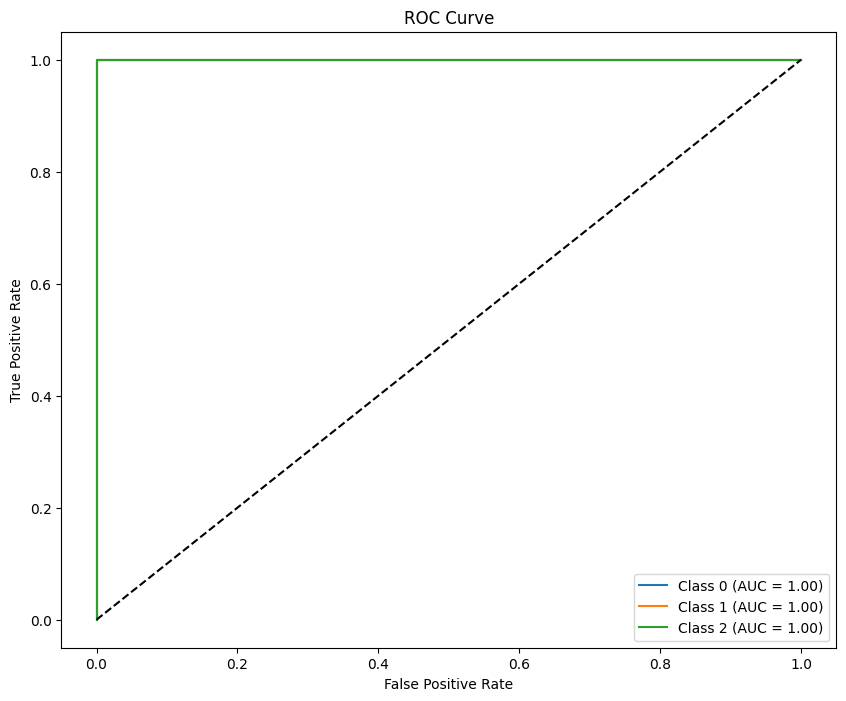

In [ ]:
# Since the Iris dataset has 3 classes, we need to binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred, classes=[0, 1, 2])

# Compute the ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

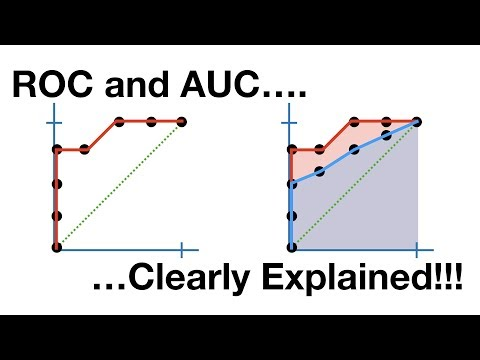

In [ ]:
from IPython.display import YouTubeVideo

video_id = '4jRBRDbJemM'
YouTubeVideo(video_id, width=800, height=450)

## 2. Regression: Boston Housing Dataset

Next, we'll use the Boston housing dataset for a regression example. This dataset contains information about housing in Boston, including features like crime rate, average number of rooms, and property tax rate. The goal is to predict the median value of owner-occupied homes.

In [ ]:
housing = fetch_openml(name="house_prices", as_frame=True)
X = housing.data

# Encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame with encoded features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded features
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, X_encoded_df], axis=1)


y = housing.target

X = X.dropna()
y = y[X.index]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


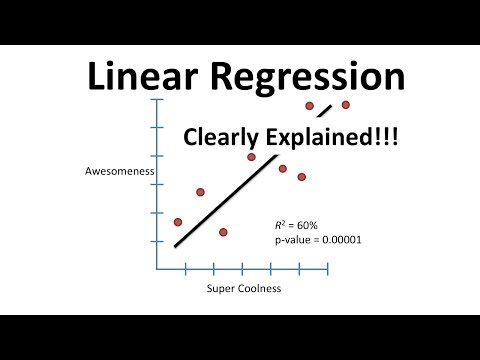

In [ ]:
from IPython.display import YouTubeVideo

video_id = 'nk2CQITm_eo'
YouTubeVideo(video_id, width=800, height=450)

In [ ]:
# Initialize the linear regression model
lr = LinearRegression()

# Train the model on the training set
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Root Mean Squared Error (RMSE): 62940.83
R-squared: 0.49
Mean Absolute Error (MAE): 23139.01


### Understanding Regression Metrics

- **Root Mean Squared Error (RMSE)**: RMSE measures the average magnitude of the errors between predicted and actual values. It is the square root of the average of squared differences between prediction and actual observation. Lower RMSE values indicate better fit.

- **R-squared (R²)**: R², also known as the coefficient of determination, measures the proportion of variance in the dependent variable that is predictable from the independent variables. R² values range from 0 to 1, with higher values indicating better fit.

- **Mean Absolute Error (MAE)**: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It is the average over the test sample of the absolute differences between prediction and actual observation. Lower MAE values indicate better fit.

In [ ]:
## End of Script